In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SIR Model

In [2]:
def modelSIR(init, params, T, dt):
    """
    This function gives us a basic SIR model implementation 
    """
    beta, gamma = params
    S0, I0, R0 = init
    N = S0 + I0 + R0
    
    S, I, R = [S0], [I0], [R0]
    for t in range(1, int(T / dt)):
        S_to_I = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        I_to_R = min(I[-1], (gamma * I[-1]) * dt)
        
        next_S = S[-1] - S_to_I
        next_I = I[-1] + S_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, I, R])

/home/ridouane/anaconda3/envs/Computer-Vision-Python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


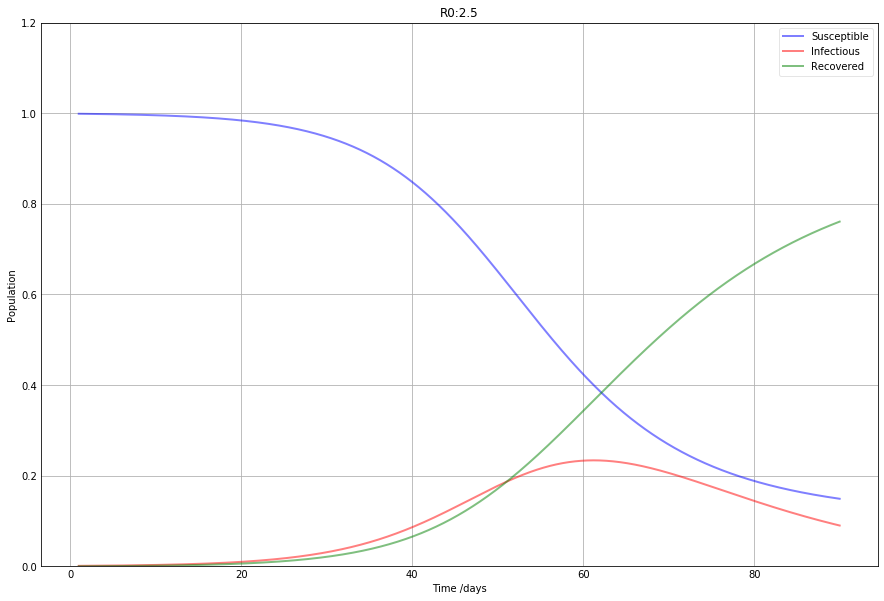

In [3]:
#initialization
N = 1000
beta = 0.2
gamma = 0.08
R0 = 2.5

init = [N-1, 1, 0]
params = beta, gamma
T = 90
dt = 1e-3

results = modelSIR(init, params, T, dt)
S = results[0]
I = results[1]
R = results[2]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('R0:' + str(R0))
plt.show()

## Stochastic SEIR Model

In [38]:
def modelSEIR(init, params, T, dt):
    """
    This function gives us a stochastic SEIR model implementation where both gamma and sigma follow exponential laws
    """
    beta, sigma, gamma = params
    S0, E0, I0, R0 = init
    N = S0 + E0 + I0 + R0
    
    S, E, I, R = [S0], [E0], [I0], [R0]
    for t in range(1, int(T/dt)):        
        sigma_t = np.random.exponential(sigma)
        gamma_t = np.random.exponential(gamma)
        
        S_to_E = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        E_to_I = min(E[-1], (sigma_t * E[-1]) * dt)
        I_to_R = min(I[-1], (gamma_t * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, E, I, R])

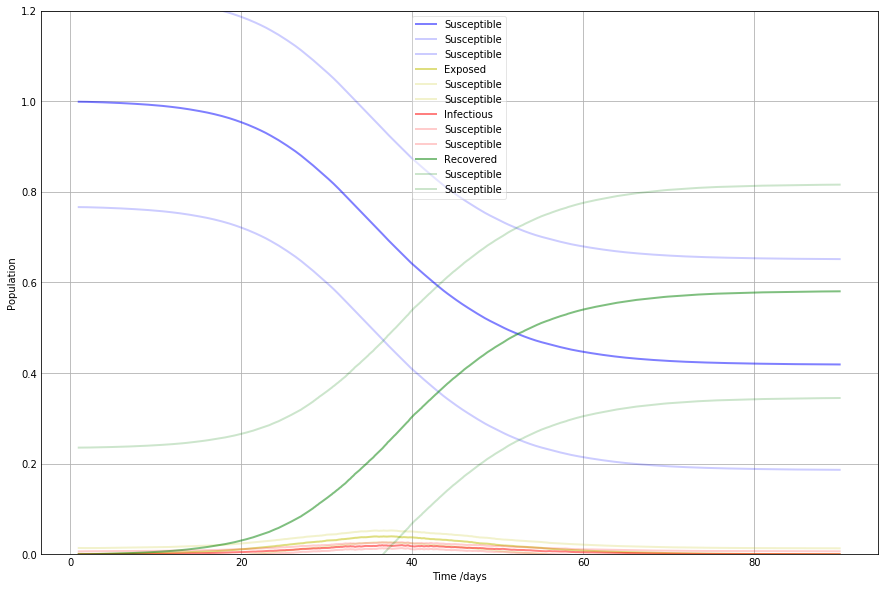

In [39]:
#initialization
N = 1000
R0 = 1.5
sigma= 1 / 2.
gamma = 1 / 1.
beta = R0 * gamma
T, dt = 90, 1e-1

init = [N-1, 1, 0, 0]
params = beta, sigma, gamma

S, E, I, R = [], [], [], []
m = 100
for k in range(m):
    results = modelSEIR(init, params, T, dt)
    S.append(results[0])
    E.append(results[1])
    I.append(results[2])
    R.append(results[3])
S, E, I, R = np.mean(S, axis=0), np.mean(E, axis=0), np.mean(I, axis=0), np.mean(R, axis=0)
S_min, S_max = S - np.sqrt(np.var(S, axis=0)), S + np.sqrt(np.var(S, axis=0))
E_min, E_max = E - np.sqrt(np.var(E, axis=0)), E + np.sqrt(np.var(E, axis=0))
I_min, I_max = I - np.sqrt(np.var(I, axis=0)), I + np.sqrt(np.var(I, axis=0))
R_min, R_max = R - np.sqrt(np.var(R, axis=0)), R + np.sqrt(np.var(R, axis=0))
    
t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, S_min/N, 'b', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, S_max/N, 'b', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, E_min/N, 'y', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, E_max/N, 'y', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, I_min/N, 'r', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, I_max/N, 'r', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, R_min/N, 'g', alpha=0.2, lw=2, label='Susceptible')
ax.plot(t, R_max/N, 'g', alpha=0.2, lw=2, label='Susceptible')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

Now if we consider that `gamma` and `sigma`follow Erlang distribution with rate = 2 as they do in the paper.

In [34]:
def modelSEIR(init, params, T, dt):
    """
    This function gives us a stochastic SEIR model implementation where both gamma and sigma follow Erlang(2) laws
    """
    beta, sigma, gamma = params
    S0, E0, I0, R0 = init
    N = S0 + E0 + I0 + R0
    
    S, E, I, R = [S0], [E0], [I0], [R0]
    for t in range(1, int(T/dt)):        
        #for Erlang distribution
        sigma_t = np.random.gamma(sigma, 2)
        gamma_t = np.random.gamma(gamma, 2)
        
        S_to_E = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        E_to_I = min(E[-1], (sigma_t * E[-1]) * dt)
        I_to_R = min(I[-1], (gamma_t * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, E, I, R])

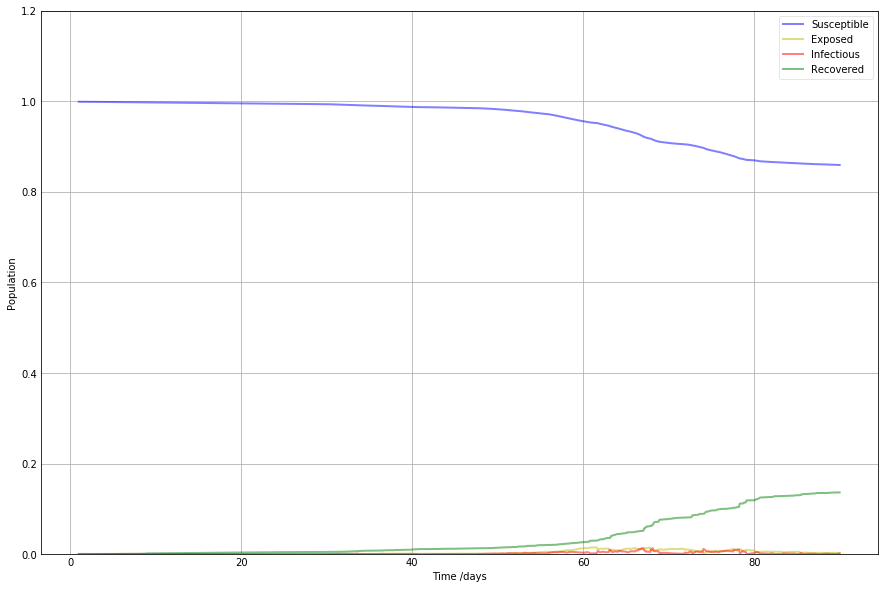

In [35]:
#initialization
N = 1000
R0 = 2.5
sigma= 1 / 5.2
gamma = 1 / 2.9
beta = R0 * gamma
T, dt = 90, 1e-1

init = [N-1, 1, 0, 0]
params = beta, sigma, gamma

S, E, I, R = [], [], [], []
m = 1
for k in range(m):
    results = modelSEIR(init, params, T, dt)
    S.append(results[0])
    E.append(results[1])
    I.append(results[2])
    R.append(results[3])
S, E, I, R = np.mean(S, axis=0), np.mean(E, axis=0), np.mean(I, axis=0), np.mean(R, axis=0)
    
t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

## Stochastic SEIR Model + Varying beta

In their paper, the authors claim that the transmission rate (`beta`) follows a geometric Brownian motion: 
$$\mathrm{d} \log (\beta(t))=a \mathrm{dB}_{\mathrm{t}}$$
In the subsequent part we add this to our model using QMC methods.

In [70]:
def model(init, params, T, dt, a):
    """
    This function gives us a stochastic SEIR model implementation where both gamma and sigma follow Erlang(2) laws
    """
    S0, E0, I0, R0, Q0, D0, C0 = init
    beta, sigma, gamma, kappa = params
    
    S, E, I, R, Q, D, C = [S0], [E0], [I0], [R0], [Q0], [D0], [C0]
    N = S0 + E0 + I0 + R0
    
    Z = np.random.normal(0, 1, int(T/dt))
    beta_t = beta
    
    for t in range(1, int(T/dt)):
        #beta_t = beta_t * (1. + np.sqrt(dt) * 0.4 * G[t])
        beta_t = beta_t * np.exp(np.sqrt(dt) * a * Z[t])
        
        sigma_t = np.random.gamma(sigma,2)
        gamma_t = np.random.gamma(gamma,2)
        kappa_t = np.random.gamma(kappa,2)
        
        S_to_E = min(S[-1], (beta_t * S[-1] * (I[-1]) / N) * dt)
        E_to_I = min(E[-1], (sigma_t * E[-1]) * dt)
        I_to_R = min(I[-1], (gamma_t * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        Q_to_C = min(Q[-1], kappa_t * Q[-1])
        
        next_D = D[-1] + E_to_I * np.exp(- gamma * kappa)
        next_Q = Q[-1] + E_to_I * np.exp(- gamma * kappa) - Q_to_C
        next_C = C[-1] + Q_to_C
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
        D.append(next_D)
        Q.append(next_Q)
        C.append(next_C)
        
    return np.stack([S, E, I, R, Q, D, C])

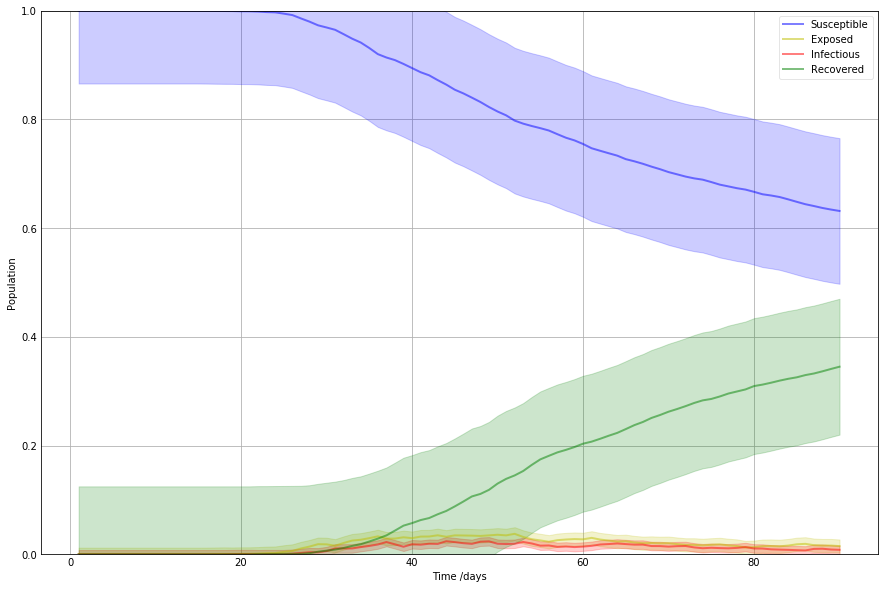

In [71]:
#initialization
R0 = 1.65
N = 67e6

#in the paper they estimate
a = 0.395

sigma= 1 / 5.2
gamma = 1 / 2.9
kappa = 1 / 6.1
beta = R0 * gamma

T, dt = 90, 1e-0

init = [N-1, 1, 0, 0, 0, 0, 0]
params = beta, sigma, gamma, kappa

S, E, I, R = [], [], [], []
m = 1000
for k in range(m):
    results = model(init, params, T, dt, a)
    S.append(results[0])
    E.append(results[1])
    I.append(results[2])
    R.append(results[3])
S, E, I, R = np.mean(S, axis=0), np.mean(E, axis=0), np.mean(I, axis=0), np.mean(R, axis=0)
S_min, S_max = S - np.sqrt(np.var(S, axis=0)), S + np.sqrt(np.var(S, axis=0))
E_min, E_max = E - np.sqrt(np.var(E, axis=0)), E + np.sqrt(np.var(E, axis=0))
I_min, I_max = I - np.sqrt(np.var(I, axis=0)), I + np.sqrt(np.var(I, axis=0))
R_min, R_max = R - np.sqrt(np.var(R, axis=0)), R + np.sqrt(np.var(R, axis=0))
    
t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.fill_between(t, S_min/N, S_max/N, color='b', alpha=0.2)
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.fill_between(t, E_min/N, E_max/N, color='y', alpha=0.2)
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.fill_between(t, I_min/N, I_max/N, color='r', alpha=0.2)
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.fill_between(t, R_min/N, R_max/N, color='g', alpha=0.2)
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0, 1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

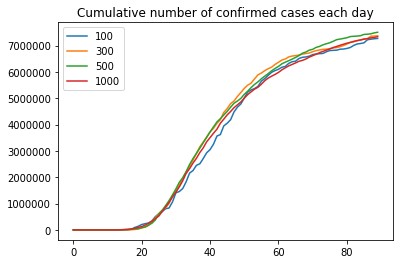

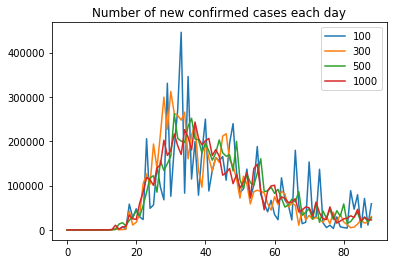

In [48]:
N = 11e6
sigma= 1. / 5.2
gamma = 1. / 2.9
kappa = 1. / 6.1
beta = 3.

a = 0.395

E0, I0 = 1, 0
init = [N-E0-I0, E0, I0, 0, 0, 0, 0] #[S0, E0, I0, R0, Q0, D0, C0]
params = beta, sigma, gamma, kappa

T = 90
dt = 1e-0

for m in [100, 300, 500, 1000]:
    confirmed_cases = []
    for k in range(m):
        results = model(init, params, T, dt, a)
        confirmed_cases.append(results[-1])

    Y = np.mean(confirmed_cases, axis=0)
    plt.title('Cumulative number of confirmed cases each day')
    plt.plot(np.arange(0, T, dt), Y, label=str(m))
plt.legend()
plt.show()

for m in [100, 300, 500, 1000]:
    confirmed_cases = []
    for k in range(m):
        results = model(init, params, T, dt, a)
        confirmed_cases.append(results[-1])

    Y = np.mean(confirmed_cases, axis=0)
    Z = Y[1:] - Y[:-1]
    plt.title('Number of new confirmed cases each day')
    plt.plot(np.arange(0, T, dt)[:-1], Z, label=str(m))
plt.legend()
plt.show()

## Simulate a Geometric Brownian Motion

In order to simulate the motion of `beta` we tried various methods described hereafter. 

The first technique is to implement it by sampling a random normally distributed number $X$ with mean 0 and standard deviation a, then define $\beta(t+1) = \beta(t)e^X.$

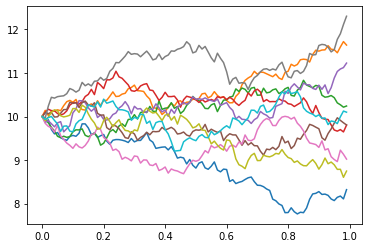

In [13]:
# Brownian Motion - Exact simulation
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.395

for k in range(10):
    X = [X0]
    
    #Z = np.random.normal(0, 1, N)
    tmp = np.random.uniform(size=(N, 2))
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] + np.sqrt(h) * Z[i])
    plt.plot(np.arange(0, T, h), X)
plt.show()

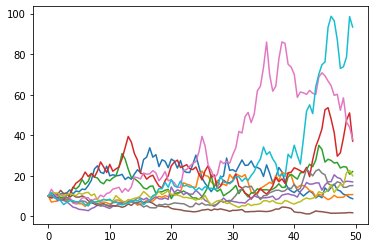

In [103]:
# Geometric Brownian Motion - Exact simulation
N, T, X0 = 100, 50, 10.
h = T / N
a = 0.20

for k in range(10):
    X = [X0]
    
    #Z = np.random.normal(0, 1, N)
    tmp = np.random.uniform(size=(N, 2))
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] * np.exp(np.sqrt(h) * a * Z[i]))
    plt.plot(np.arange(0, T, h), X)
plt.show()

## Random Quasi-Monte Carlo

Now we will use RQMC techniques, but first let's illustrate how QMC works. Instead of sampling independent varibles from an uniform distribution we use a low-discrepancy sequence (here Sobol sequence). If the sequence is well-chosen, the approximation error is smaller with RQMC and the latter has a better convergence rate than MC.

In [105]:
N = 1000

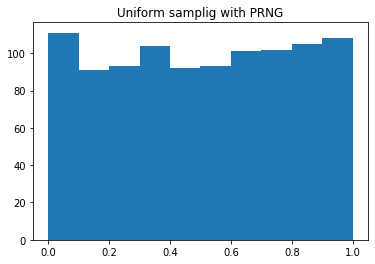

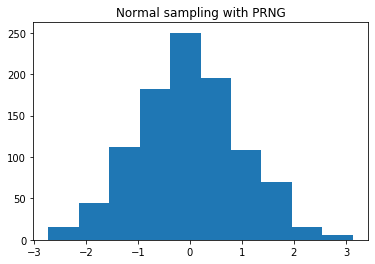

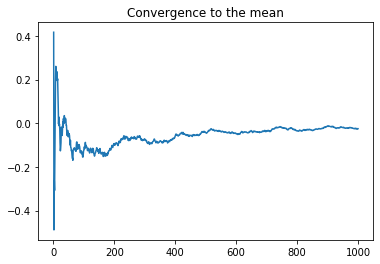

In [106]:
# Uniform sampling with Pseudo Random Number Generator (Mersenne Twister)
X = np.random.uniform(size=N)
plt.hist(X, bins=10)
plt.title('Uniform samplig with PRNG')
plt.show()

# Normal sampling with Pseudo Random Number Generator (Mersenne Twister)
tmp = np.random.uniform(size=(N, 2))
U1, U2 = tmp[:,0], tmp[:,1]
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
plt.hist(Z, bins=10)
plt.title('Normal sampling with PRNG')
plt.show()

Y = np.cumsum(Z) / np.arange(1, len(Z)+1, 1)
plt.title('Convergence to the mean')
plt.plot(np.arange(1, len(Z)+1, 1), Y)
plt.show()

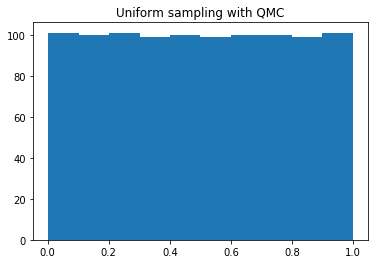

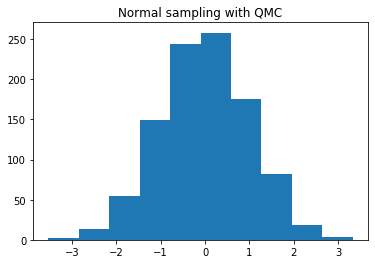

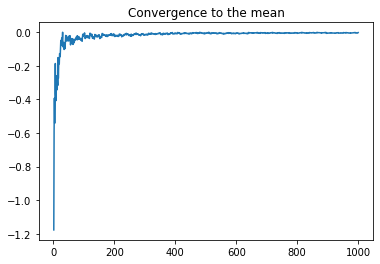

In [107]:
import sobol_seq

# Uniform sampling with Quasi Monte Carlo (Sobol sequence)
X = sobol_seq.i4_sobol_generate(1, N)
plt.hist(X, bins=10)
plt.title('Uniform sampling with QMC')
plt.show()

# Normal sampling with Quasi Monte Carlo (Sobol sequence)
tmp = sobol_seq.i4_sobol_generate(2, N)
U1, U2 = tmp[:,0], tmp[:,1]
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
plt.hist(Z, bins=10)
plt.title('Normal sampling with QMC')
plt.show()

Y = np.cumsum(Z) / np.arange(1, len(Z)+1, 1)
plt.title('Convergence to the mean')
plt.plot(np.arange(1, len(X)+1, 1), Y)
plt.show()

By comparing the two `Convergence to the mean` graph, we see that the convergence rate with RQMC is better.

## Geometric Brownian Motion + Randomized Quasi Monte Carlo

Now we will use RQMC to simulate the geometric brownian motion with Sobol sequence.

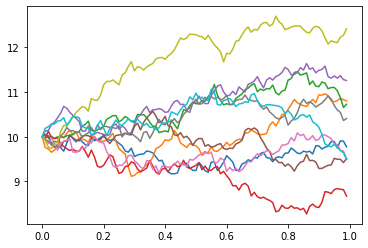

In [108]:
# Brownian Motion - Sobol sequence
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    tmp = sobol_seq.i4_sobol_generate(2, N)
    randomization = np.random.uniform(size=(N, 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] + np.sqrt(h) * Z[i])
    plt.plot(np.arange(0, T, h), X)
plt.show()

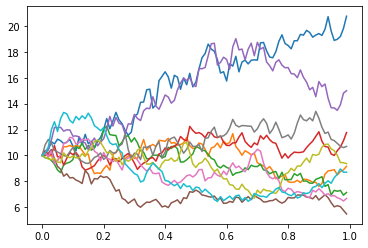

In [111]:
# Geometric Brownian Motion - Sobol sequence
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    tmp = sobol_seq.i4_sobol_generate(2, N)
    randomization = np.random.uniform(size=(N, 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] * np.exp(np.sqrt(h) * a * Z[i]))
    plt.plot(np.arange(0, T, h), X)
plt.show()

## Stochastic SEIR Model with Randomized Quasi-Monte Carlo

Stochastic implementation of the model with RQMC (Sobol sequence).

In [157]:
def model(init, params, T, dt, a):
    S0, E0, I0, R0, Q0, D0, C0 = init
    beta, sigma, gamma, kappa = params
    
    S, E, I, R, Q, D, C = [S0], [E0], [I0], [R0], [Q0], [D0], [C0]
    N = S0 + E0 + I0 + R0
    
    #Z = np.random.normal(0, 1, int(T/dt))
    
    tmp = sobol_seq.i4_sobol_generate(2, int(T/dt))
    randomization = np.random.uniform(size=(int(T/dt), 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    beta_t = beta
    
    for t in range(1, int(T/dt)):
        #beta_t = beta_t * (1. + np.sqrt(dt) * 0.4 * G[t])
        beta_t = beta_t * np.exp(np.sqrt(dt) * a * Z[t])
        
        sigma_t = np.random.gamma(sigma,2)
        gamma_t = np.random.gamma(gamma,2)
        kappa_t = np.random.gamma(kappa,2)
        
        S_to_E = min(S[-1], (beta_t * S[-1] * (I[-1]) / N) * dt)
        E_to_I = min(E[-1], (sigma_t * E[-1]) * dt)
        I_to_R = min(I[-1], (gamma_t * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        Q_to_C = min(Q[-1], kappa_t * Q[-1])
        
        next_D = D[-1] + E_to_I * np.exp(- gamma * kappa)
        next_Q = Q[-1] + E_to_I * np.exp(- gamma * kappa) - Q_to_C
        next_C = C[-1] + Q_to_C
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
        D.append(next_D)
        Q.append(next_Q)
        C.append(next_C)
        
    return np.stack([S, E, I, R, Q, D, C])

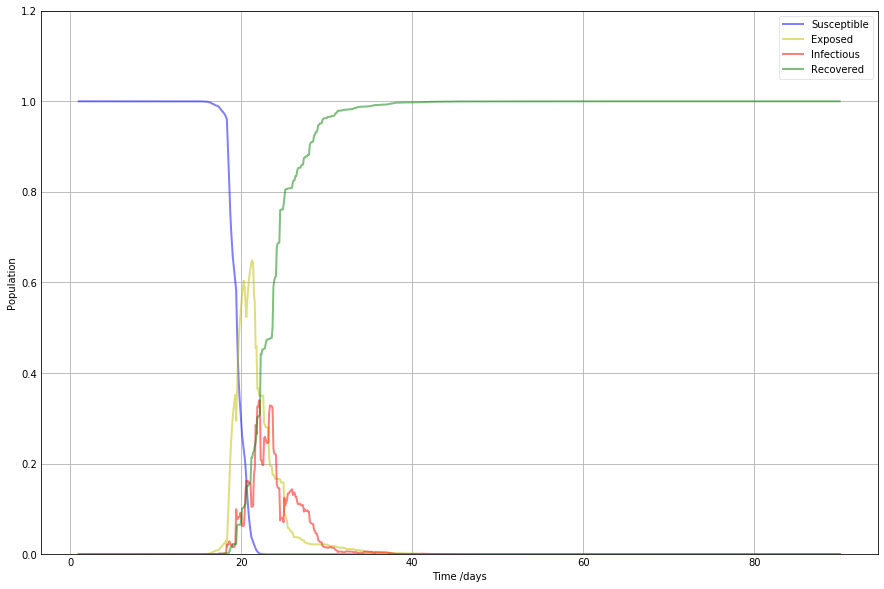

In [160]:
#initialization
R0 = 4.5
N = 11e6

#in the paper they estimate
a = 0.395

sigma= 1 / 5.2
gamma = 1 / 2.9
kappa = 1 / 6.1
beta = R0 * gamma

T, dt = 90, 1e-1

init = [N-1, 1, 0, 0, 0, 0, 0]
params = beta, sigma, gamma, kappa

results = model(init, params, T, dt, a)
S = results[0]
E = results[1]
I = results[2]
R = results[3]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

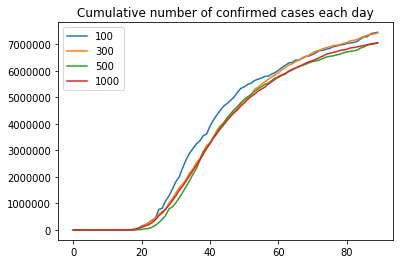

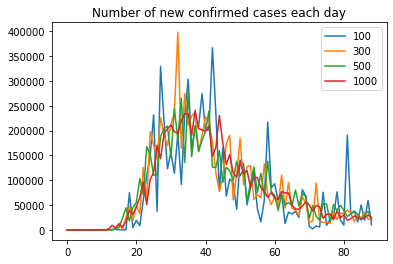

In [161]:
N = 11e6
sigma= 1. / 5.2
gamma = 1. / 2.9
kappa = 1. / 6.1
beta = 3.

a = 0.395

E0, I0 = 1, 0
init = [N-E0-I0, E0, I0, 0, 0, 0, 0] #[S0, E0, I0, R0, Q0, D0, C0]
params = beta, sigma, gamma, kappa

T = 90
dt = 1e-0

for m in [100, 300, 500, 1000]:
    confirmed_cases = []
    for k in range(m):
        results = model(init, params, T, dt, a)
        confirmed_cases.append(results[-1])

    Y = np.mean(confirmed_cases, axis=0)
    plt.title('Cumulative number of confirmed cases each day')
    plt.plot(np.arange(0, T, dt), Y, label=str(m))
plt.legend()
plt.show()

for m in [100, 300, 500, 1000]:
    confirmed_cases = []
    for k in range(m):
        results = model(init, params, T, dt, a)
        confirmed_cases.append(results[-1])

    Y = np.mean(confirmed_cases, axis=0)
    Z = Y[1:] - Y[:-1]
    plt.title('Number of new confirmed cases each day')
    plt.plot(np.arange(0, T, dt)[:-1], Z, label=str(m))
plt.legend()
plt.show()

## Application of the model on France

### Get the data

For this purpose we will use the European dataset; available at https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863?fbclid=IwAR14a3w3tKNg8uUzmxy1Z1XvHmkm2DEmmGY_JNomfwjEPRiSnBditTLDExg

In [162]:
import pandas as pd

In [163]:
df = pd.read_excel('./data/COVID-19-geographic-disbtribution-worldwide.xlsx')
print(df.shape)
df.head()

(11152, 10)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
3,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0


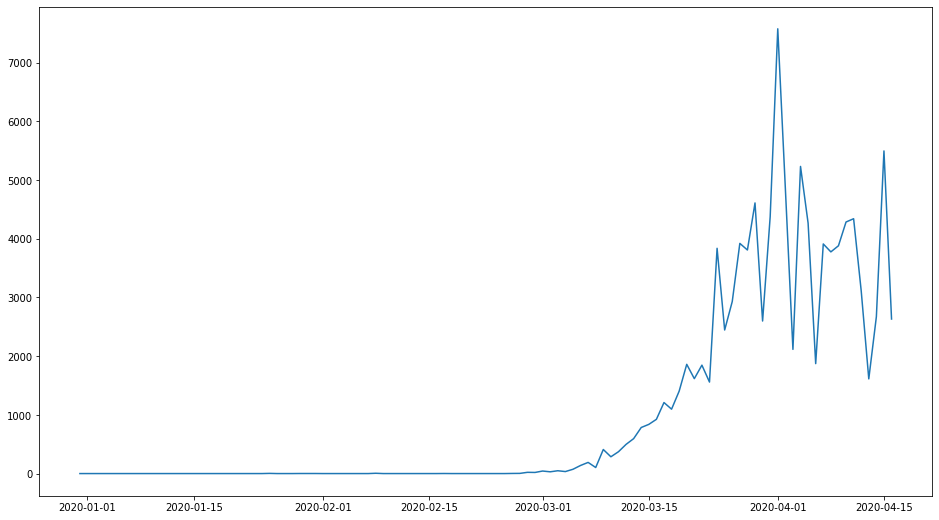

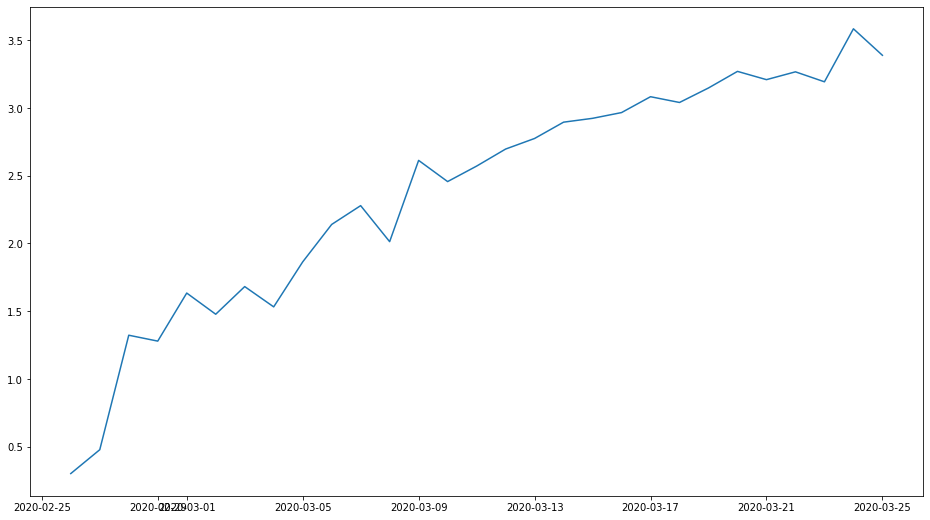

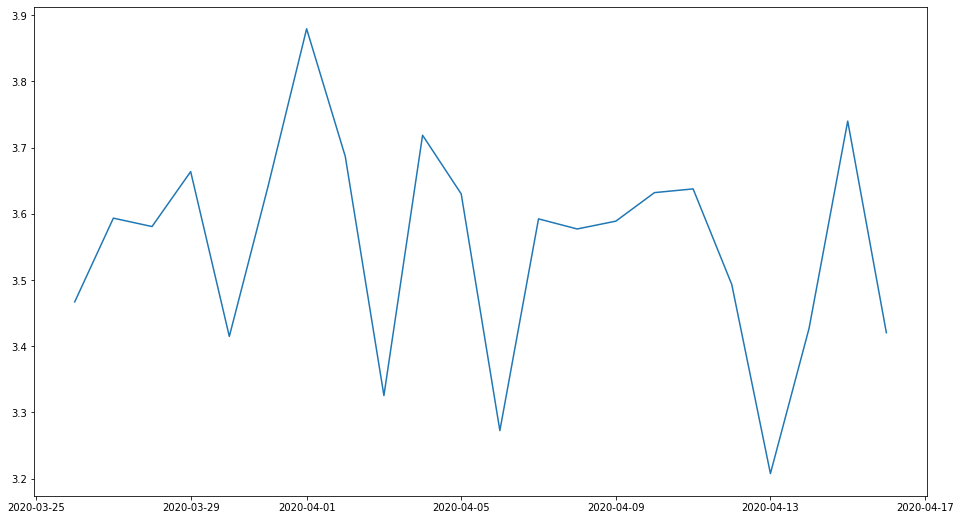

In [168]:
df = df[df.countriesAndTerritories == 'France'].sort_values('dateRep')

plt.figure(figsize=(16,9))
plt.plot(df['dateRep'], df['cases'])
plt.show()

plt.figure(figsize=(16,9))
tmp = df[(df['dateRep'] <= '2020-03-25') & (df['dateRep'] >= '2020-02-26')]
plt.plot(tmp['dateRep'], np.log10(tmp['cases']))
plt.show()

plt.figure(figsize=(16,9))
tmp = df[(df['dateRep'] >= '2020-03-26')]
plt.plot(tmp['dateRep'], np.log10(tmp['cases']))
plt.show()

$$S'(t) = - \beta I(t) S(t) / N$$
$$I'(t) = \beta I(t) S(t) / N - \gamma I(t)$$
$$R'(t) = \gamma I(t)$$

Phase initiale : $S/N$ reste constant (approx.) égal à 1 car il y a très peu d'infectés et presque qu'aucuns rétablis/morts. Donc $I'(t) = (\beta - \gamma) I(t) = \gamma (R_0 - 1) I(t)$ avec $R_0 = \beta / \gamma$. On peut alors estimer R0 simplement à l'aide d'une simple régression linéaire de ln(I(t)) dans la phase intiale de l'épidémie :

$$I'(t)/I(t) = \gamma (R_0 - 1) \to ln I(t) = \gamma (R_0 - 1) (t-t_0) + ln I(t_0)$$

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
y = np.log(df[(df['dateRep'] <= '2020-03-25') & (df['dateRep'] >= '2020-02-26')].cases.values).reshape((-1, 1))
X = np.arange(0, y.shape[0], 1).reshape((-1, 1))
reg = LinearRegression().fit(X, y)
print('R0:', 1 + (reg.coef_[0,0] * 2.9))

R0: 1.6556990138691043


In [171]:
y = np.log(df[(df['dateRep'] >= '2020-03-18')].cases.values).reshape((-1, 1))
X = np.arange(0, y.shape[0], 1).reshape((-1, 1))
reg = LinearRegression().fit(X, y)
print('R0:', 1 + (reg.coef_[0,0] * 2.9))

R0: 1.0694727329713756


In [29]:
def model(init, params, T, dt):
    S0, E0, I0, R0 = init
    N = S0 + E0 + I0 + R0
    R0, T_incubation, T_infectious = params
    
    S, E, I, R = [S0], [E0], [I0], [R0]
    incidence = [0.]
    for t in range(1, int(T/dt)):
        sigma_t = sigma
        gamma_t = gamma
        
        #sigma_t = np.random.exponential(sigma)
        #gamma_t = np.random.exponential(gamma)
        
        S_to_E = min(S[-1], ((R0 / T_infectious)* I[-1] * S[-1] / N) * dt)
        E_to_I = min(E[-1], ((1. / T_incubation) * E[-1]) * dt)
        I_to_R = min(I[-1], ((1. / T_infectious) * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
        incidence.append(S_to_E)
        
    return np.stack([S, E, I, R]), incidence

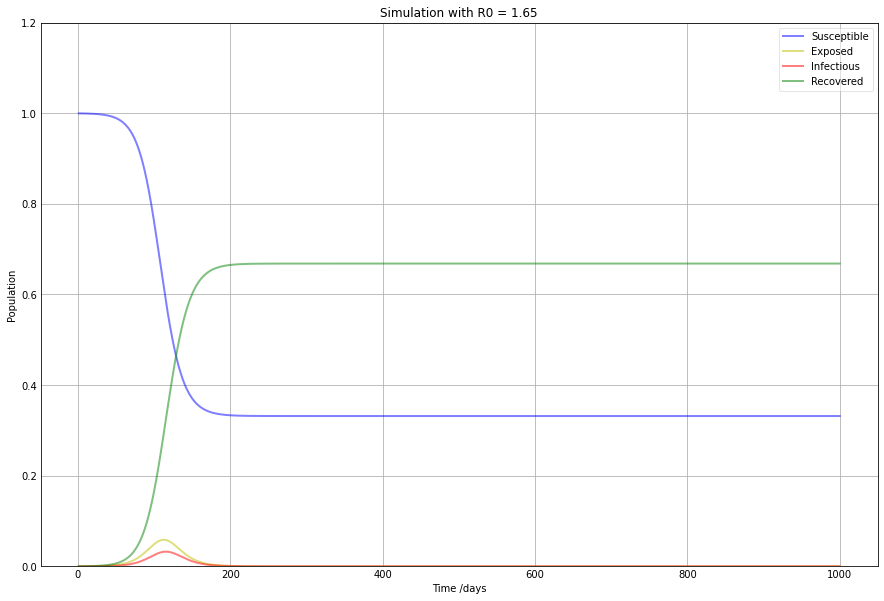

In [30]:
N = 66e6
init_case = 10_000

R0 = 1.65
T_incubation = 5.2 # length of incubation period
T_infectious = 2.9 # length of infectious period

T, dt = 1000, 1e-1

init = [N-init_case, init_case, 0, 0]
params = R0, T_incubation, T_infectious

results, incidence = model(init, params, T, dt)
S, E, I, R = results[0], results[1], results[2], results[3]
    
t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('Simulation with R0 = {}'.format(R0))
plt.show()

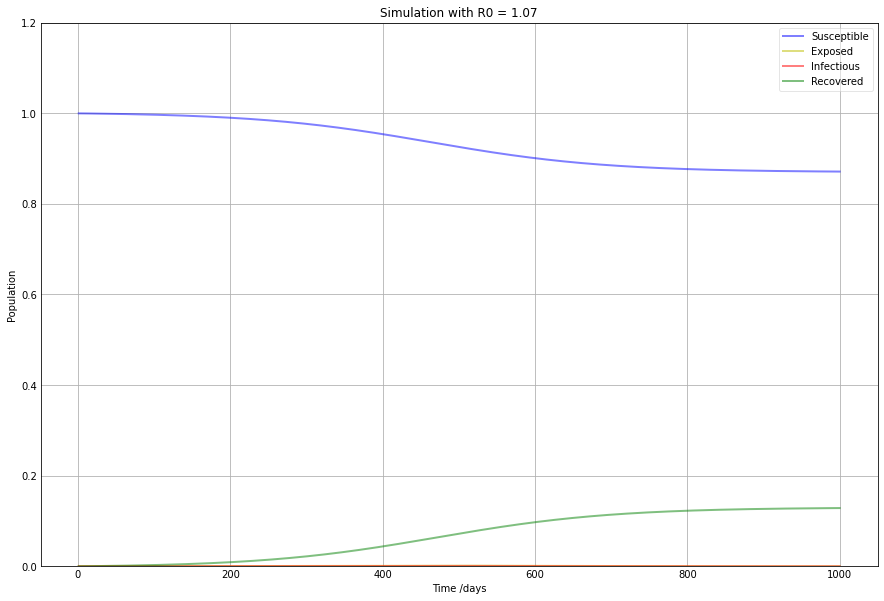

In [31]:
N = 66e6
init_case = 10_000

R0 = 1.07
T_incubation = 5.2 # length of incubation period
T_infectious = 2.9 # length of infectious period

T, dt = 1000, 1e-1

init = [N-init_case, init_case, 0, 0]
params = R0, T_incubation, T_infectious

results, incidence = model(init, params, T, dt)
S, E, I, R = results[0], results[1], results[2], results[3]
    
t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('Simulation with R0 = {}'.format(R0))
plt.show()

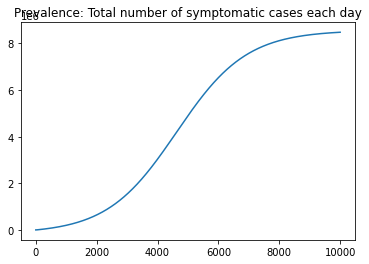

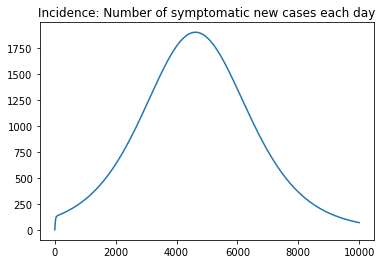

In [32]:
prevalence = np.cumsum(incidence)

plt.plot(np.arange(0, len(prevalence), 1), prevalence)
plt.title('Prevalence: Total number of symptomatic cases each day')
plt.show()

plt.plot(np.arange(0, len(incidence), 1), incidence)
plt.title('Incidence: Number of symptomatic new cases each day')
plt.show()